In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
customers = pd.read_csv("Ecommerce Customers")

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
####################EDA##############

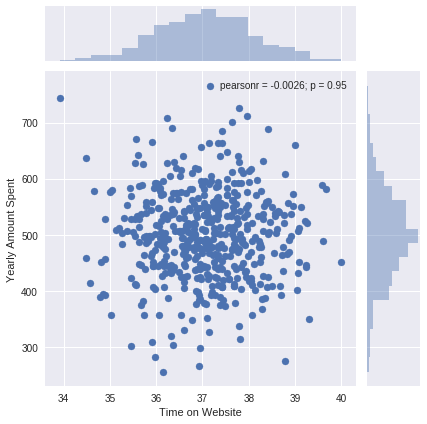

In [8]:
sns.jointplot("Time on Website","Yearly Amount Spent", data=customers)

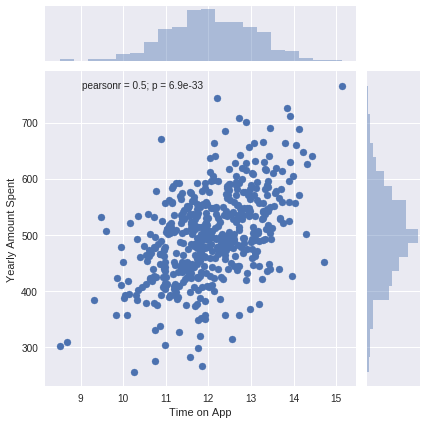

In [9]:
sns.jointplot("Time on App","Yearly Amount Spent", data=customers)

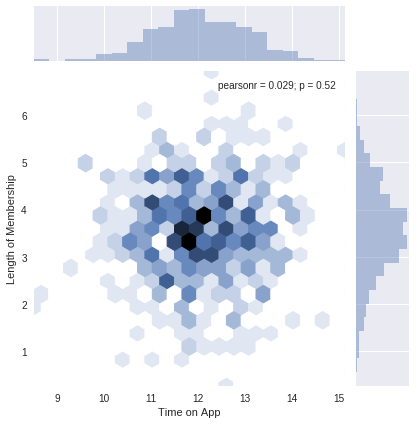

In [10]:
sns.jointplot("Time on App","Length of Membership", data=customers, kind="hex", bins=150)

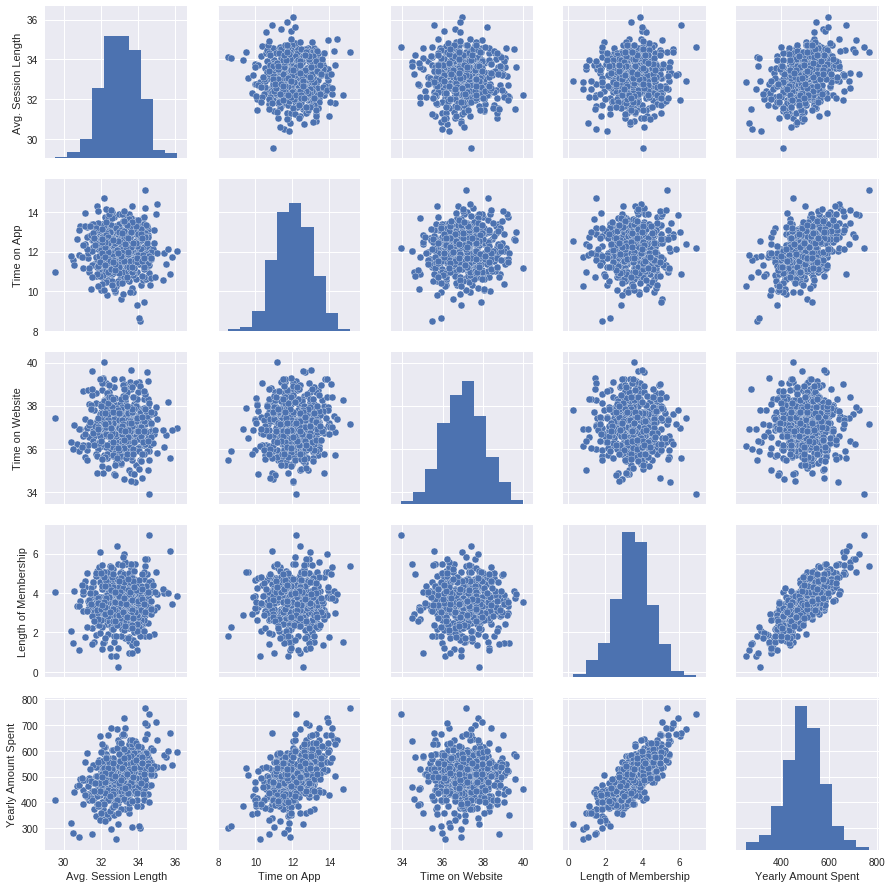

In [11]:
sns.pairplot(customers)

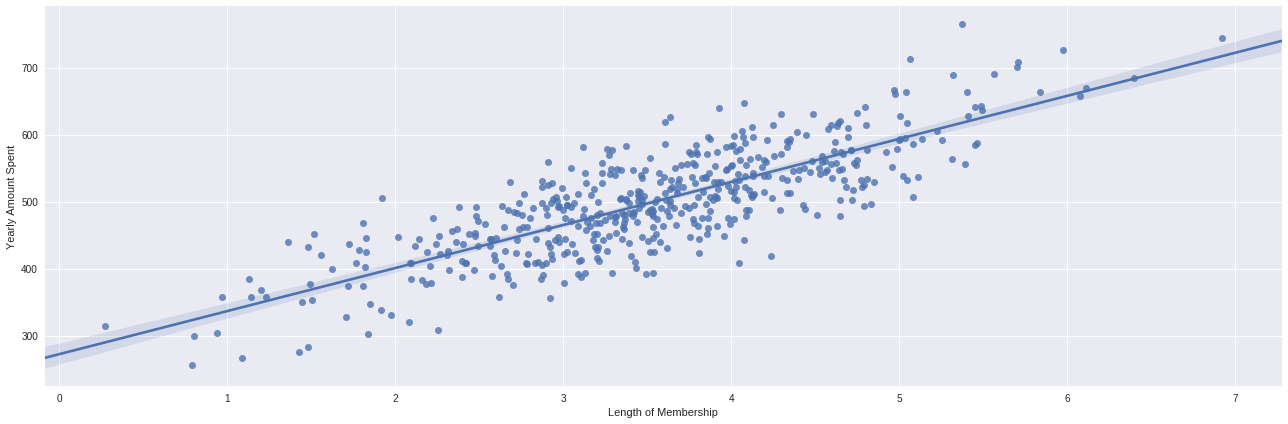

In [12]:
sns.lmplot("Length of Membership", "Yearly Amount Spent", data=customers, size=6, aspect=3)

In [13]:
######TRAINING AND TESTING DATA#####

In [14]:
X = customers[customers.columns[3:7]]
y = customers[customers.columns[7]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#####TRAINING THE MODEL#######

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(lm.coef_)

[ 25.98154972  38.59015875   0.19040528  61.27909654]


In [20]:
predictions = lm.predict(X_test)

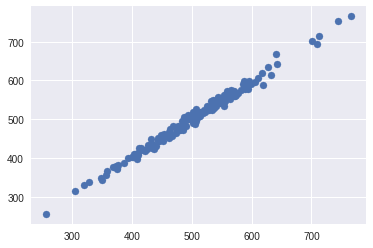

In [21]:
plt.scatter(y_test,predictions)
#This plot shows us that our test data and the predictions have high correlation,
#meaning that the linear model was a good fit

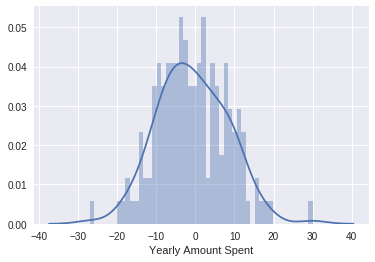

In [22]:
#Plot the residuals
sns.distplot((y_test-predictions), bins=50)
#In this case, we see that the residuals follow a normal distribution centred in zero,
#which is a good sign of a good fit

In [23]:
from sklearn import metrics

In [33]:
###############Evaluating the Model#################
print("R**2:", metrics.explained_variance_score(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Error in average(%):", 100*np.sqrt(metrics.mean_squared_error(y_test,predictions))/customers["Yearly Amount Spent"].mean())

R**2: 0.989077123189
RMSE: 8.93381506698
Error in average(%): 1.78921768315


In [34]:
'''These metrics confirm that out model was indeed a good fit. The R square coeff. is near 1 (low variance),
and the RMSE shows that, on average, our predictions vary in just 9 dollars, which is an error of
%1.7, for this particular case, this is a more than acceptable error
'''

'These metrics confirm that out model was indeed a good fit. The R square coeff. is near 1 (low variance),\nand the RMSE shows that, on average, our predictions vary in just 9 dollars, which is an error of\n%1.7, for this particular case, this is a more than acceptable error\n'

In [27]:
pd.DataFrame(lm.coef_,customers.columns[3:7],["Coeffecient"])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
